## LINEAR REGRESSION:

### Simple linear regression:


Residual Sum of Squares:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [5]:
df = pd.read_csv(r"C:\Users\sandilya_garimella\Documents\Sandilya\Training(21.12.020-21.01.2021)\DataSets\Automobile_data_full.csv")

In [6]:
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [11]:
import math

In [13]:
for channel in df.make.unique():
    indexes = (df['horsepower'].apply(lambda x: math.isnan(x))) & (df['make'] == channel)
    avg = df[df['make'] == channel].horsepower.values[0]
    df.loc[indexes, 'horesepwr'] = avg

In [16]:
df['scaled_coeff'] = df['horesepwr'] / df.horsepower.sum()

In [17]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horesepwr,scaled_coeff
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,NaN,NaN
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,NaN,NaN
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,NaN,NaN
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,NaN,NaN
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,NaN,NaN
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,NaN,NaN
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,NaN,NaN
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,NaN,NaN


In [8]:
avg

114.0

In [ ]:
df1.loc[indexes, 'coeff'] = avg

In [5]:
df.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
sns.set()

In [7]:
df1=['wheel-base', 'length', 'width', 'height', 'peak-rpm']
corr_df=df.loc[:,df1].corr()

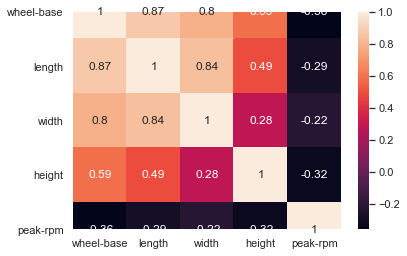

In [8]:
sns.heatmap(corr_df,annot=True)
plt.show()

D:\Users\sandilya_garimella\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


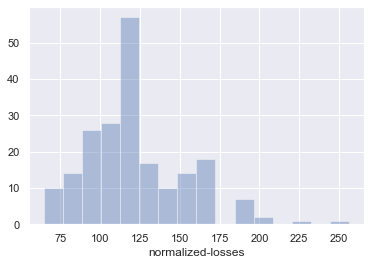

In [9]:
sns.distplot(a=df['normalized-losses'], kde=False)

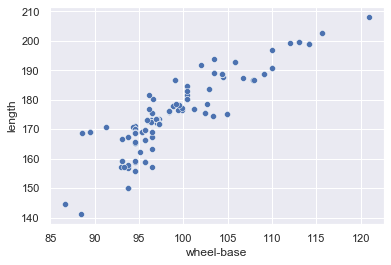

In [10]:
sns.scatterplot(x=df['wheel-base'], y=df['length'])

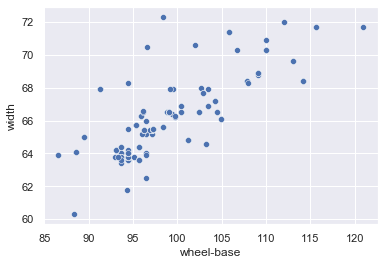

In [11]:
sns.scatterplot(x=df['wheel-base'], y=df['width'])

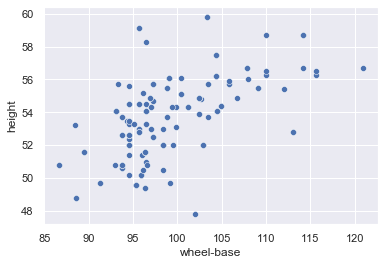

In [12]:
sns.scatterplot(x=df['wheel-base'], y=df['height'])

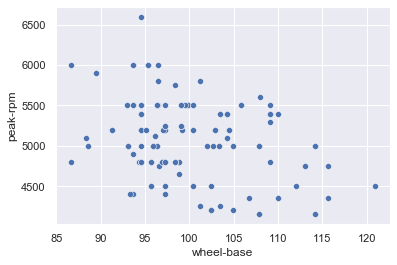

In [13]:
sns.scatterplot(x=df['wheel-base'], y=df['peak-rpm'])

In [14]:
 from sklearn import linear_model
reg = linear_model.LinearRegression()

In [15]:
X= df.drop('price',axis=1)
y= df['price']

In [16]:
X_train = X[:-20]
X_test = X[-20:]

In [17]:
y_train = y[:-20]
y_test = y[-20:]

In [18]:
y_test

185     8195
186     8495
187     9495
188     9995
189    11595
190     9980
191    13295
192    13845
193    12290
194    12940
195    13415
196    15985
197    16515
198    18420
199    18950
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, dtype: int64

In [19]:
reg.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred = reg.predict(X_test)


In [21]:
y_pred

array([10788.05086465, 10906.34693243,  8958.22367514, 11903.45499984,
       12251.67382993, 10336.1495031 , 15830.97195485,  8803.89136922,
       11103.85562362, 16063.52748983, 17302.22619842, 15919.14771124,
       17129.6806894 , 13516.03146695, 14735.95302191, 17761.04936285,
       17388.89768542, 24213.77034389, 19414.55700859, 18582.63600581])

In [22]:
 reg.coef_

array([ 6.17224356e+02, -5.83683905e+00,  1.88952776e+02, -5.16191945e+01,
        1.00979389e+02,  1.71634420e+02,  1.87771536e+00,  1.48487820e+02,
       -7.07155673e+02, -3.04367318e+03,  2.40347023e+02, -1.38844327e+01,
        3.28268561e+00, -1.87567232e+02,  4.50769915e+01])

In [23]:
#calculating mean square error
print( mean_squared_error(y_test, y_pred))

7701921.734559824


In [24]:
#calculating cofficeint of determination
print(r2_score(y_test, y_pred))

0.6192745745294612


In [25]:
#using stats model to predict 

In [26]:
model = smf.ols('y ~ X', data=df)
model = model.fit()

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     55.05
Date:                Tue, 12 Jan 2021   Prob (F-statistic):           1.33e-60
Time:                        20:33:06   Log-Likelihood:                -1957.1
No. Observations:                 205   AIC:                             3946.
Df Residuals:                     189   BIC:                             3999.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.096e+04   1.75e+04     -1.769      0.078   -6.55e+04    3555.320
X[0]         491.4347    296.960      1.655      0.100     -94.348    1077.217
X[1]          -4.4434      9.998     -0.444      0.657     -24.165      15.278
X[2]         195.0080    122.352      1.594      0.113     -46.343     436.359
X[3]         -43.7384     61.409     -0.712      0.477    -164.873      77.397
X[4]          72.8630    276.305      0.264      0.792    -472.176     617.902
X[5]         120.1956    161.486      0.744      0.458    -198.351     438.742
X[6]           1.9821      1.932      1.026      0.306      -1.830       5.794
X[7]         134.5930     15.364      8.760      0.000     104.286     164.900
X[8]       -1297.8587   1339.348     -0.969      0.334   -3939.850    1344.133
X[9]       -3070.2326    861.910     -3.562      0.000   -4770.433   -1370.032
X[10]        274.0977     92.400      2.966      0.003      91.829     456.366
X[11]          1.0971     18.313      0.060      0.952     -35.026      37.221
X[12]          2.7714      0.752      3.684      0.000       1.287       4.255
X[13]       -147.4476    200.740     -0.735      0.464    -543.426     248.531
X[14]          6.0528    178.449      0.034      0.973    -345.954     358.060
==============================================================================
Omnibus:                       25.003   Durbin-Watson:                   1.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.049
Skew:                           0.292   Prob(JB):                     6.92e-23
Kurtosis:                       6.407   Cond. No.                     4.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

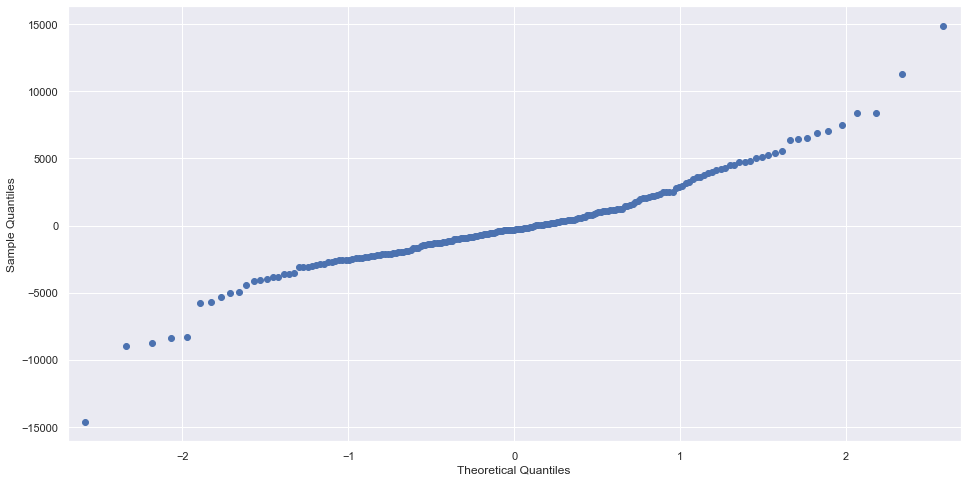

In [34]:
pred_val = model.fittedvalues.copy()
residual = y - pred_val
probplot = sm.ProbPlot(residual)
fig = probplot.qqplot()

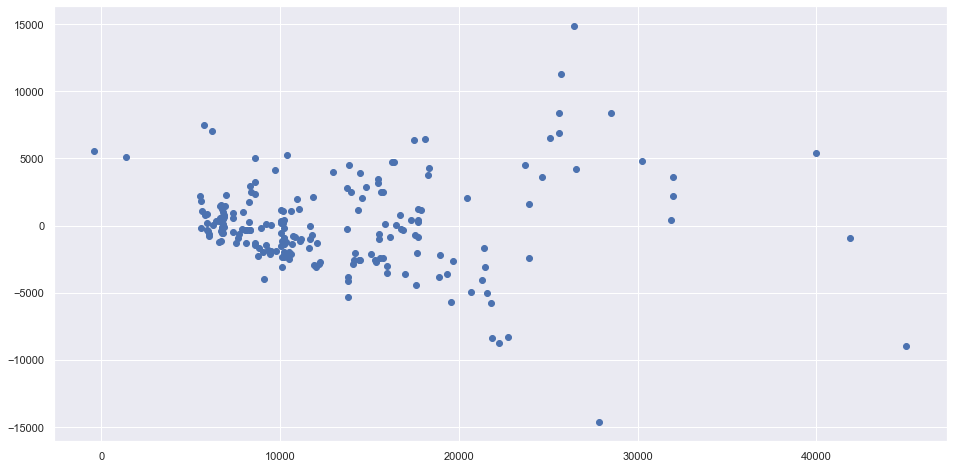

In [33]:
## Residual plot
plt.scatter(pred_val, residual)

In [32]:
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

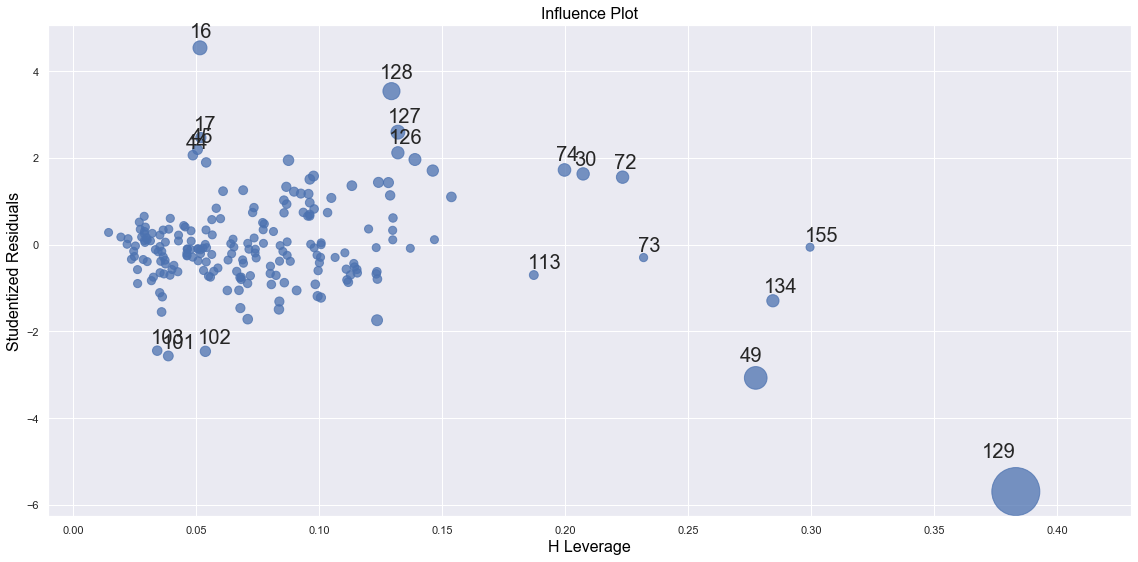

In [31]:
fig = sm.graphics.influence_plot(model, criterion="cooks")
fig.tight_layout(pad=1.0)